In [1]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


#Week 2 Project – Exploratory Data Analysis (EDA) on COVID-19 Dataset












#Objective

The main objective of this project is to perform exploratory data analysis (EDA) on the COVID-19 dataset.
We aim to understand global trends, country-level impacts, and survival vs death ratios using summary statistics and visualizations.

Dataset Description

The dataset is provided by Our World in Data (OWID) and contains:

date: The reporting date

location: Country or region name

total_cases: Cumulative number of confirmed COVID-19 cases

total_deaths: Cumulative number of COVID-19 deaths

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# Keep only the columns that exist
df = df[['date', 'location', 'total_cases', 'total_deaths']]

# Show top 5 rows
df.head()

,date,location,total_cases,total_deaths
0,2019-12-31,Afghanistan,0.0,0.0
1,2020-01-01,Afghanistan,0.0,0.0
2,2020-01-02,Afghanistan,0.0,0.0
3,2020-01-03,Afghanistan,0.0,0.0
4,2020-01-04,Afghanistan,0.0,0.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['total_cases']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'total_cases'}, axis=1)
              .sort_values('total_cases', ascending=True))
  xs = counted['total_cases']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('total_cases', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_cases')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['total_deaths']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'total_deaths'}, axis=1)
              .sort_values('total_deaths', ascending=True))
  xs = counted['total_deaths']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('total_deaths', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_deaths')
_ = plt.ylabel('count()')

#Data Cleaning

Removed duplicate entries.

Checked and handled missing values.

Focused only on relevant columns (date, location, total_cases, total_deaths).

In [4]:
# Check for null values
print("Null values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Check info
df.info()

Null values:
 date              0
location          0
total_cases     603
total_deaths    603
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          44785 non-null  object 
 1   location      44785 non-null  object 
 2   total_cases   44182 non-null  float64
 3   total_deaths  44182 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


#Exploratory Data Analysis

Displayed the top 5 rows of the dataset.

Calculated summary statistics such as mean, min, and max.

Found the total number of countries included.

Identified the top 10 most affected countries based on total confirmed cases.

In [5]:
# Summary statistics
print(df.describe())

# Number of countries
num_countries = df['location'].nunique()
print("Number of countries:", num_countries)

# Most affected countries (by total cases)
most_affected = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
print("Top 10 most affected countries:\n", most_affected)


        total_cases   total_deaths
count  4.418200e+04   44182.000000
mean   9.372153e+04    3885.163189
std    9.707004e+05   36227.966483
min    0.000000e+00       0.000000
25%    5.300000e+01       0.000000
50%    9.370000e+02      17.000000
75%    9.989000e+03     213.000000
max    3.054045e+07  952724.000000
Number of countries: 212
Top 10 most affected countries:
 location
World            30540446.0
United States     6724667.0
India             5308014.0
Brazil            4495183.0
Russia            1091186.0
Peru               756412.0
Colombia           750471.0
Mexico             688954.0
South Africa       657627.0
Spain              640040.0
Name: total_cases, dtype: float64


#Visualizations

Line Chart – Global confirmed cases over time

Shows the overall trend of infections worldwide.

Bar Chart – Top 10 countries with the highest deaths

Highlights which countries were most severely impacted.

Pie Chart – Survivors vs deaths globally

Shows proportion of recovered/survivors compared to total deaths.

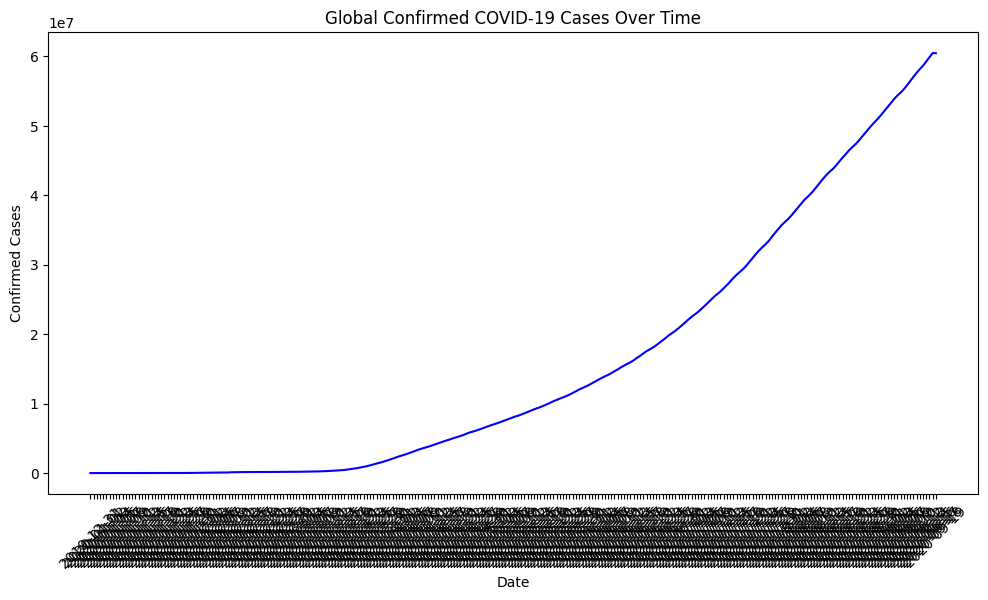

In [6]:
global_cases = df.groupby('date')['total_cases'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_cases['date'], global_cases['total_cases'], color='blue')
plt.xticks(rotation=45)
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

/tmp/ipython-input-1997907715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deaths.values, y=top_deaths.index, palette='Reds_r')


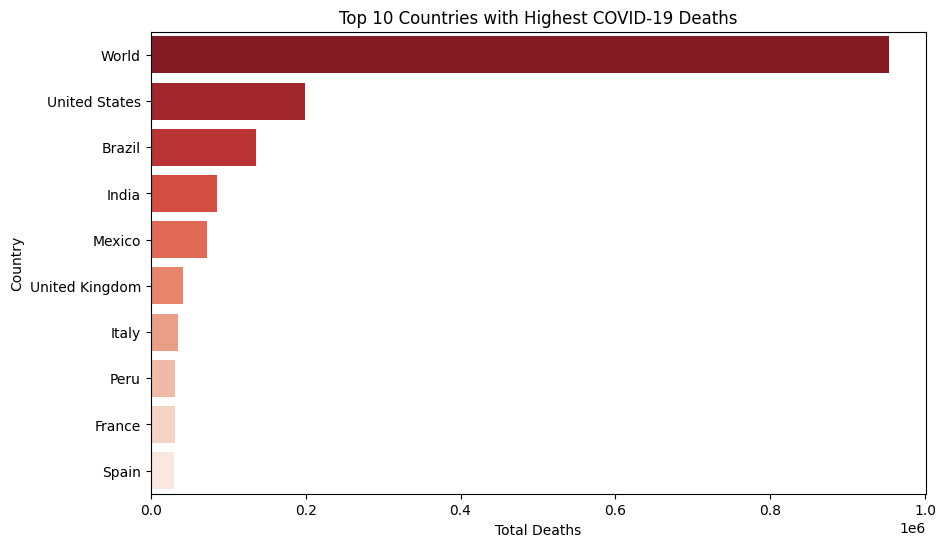

In [7]:
top_deaths = df.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_deaths.values, y=top_deaths.index, palette='Reds_r')
plt.title('Top 10 Countries with Highest COVID-19 Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

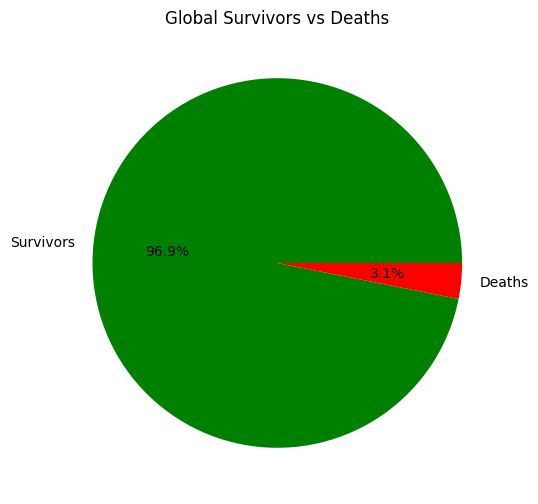

In [8]:
total_cases = df['total_cases'].max()
total_deaths = df['total_deaths'].max()
total_survivors = total_cases - total_deaths

plt.figure(figsize=(6,6))
plt.pie([total_survivors, total_deaths], labels=['Survivors', 'Deaths'],
        autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Global Survivors vs Deaths')
plt.show()

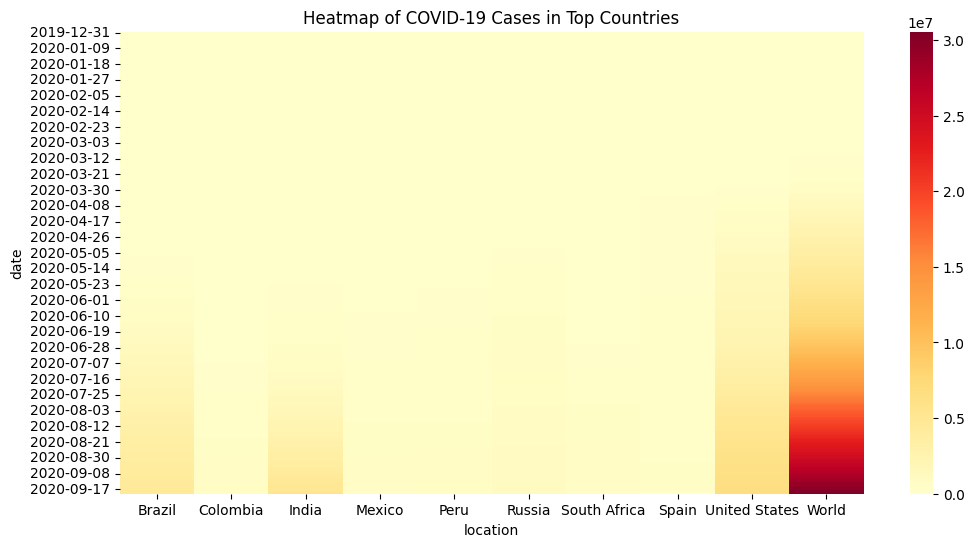

In [9]:
top_countries = df[df['location'].isin(most_affected.index)]
pivot = top_countries.pivot_table(values='total_cases', index='date', columns='location')
plt.figure(figsize=(12,6))
sns.heatmap(pivot.fillna(0), cmap="YlOrRd")
plt.title("Heatmap of COVID-19 Cases in Top Countries")
plt.show()


#Observations

1. Line Chart – Global Confirmed Cases Over Time

The curve shows an exponential increase over time, with sharp rises during waves (late 2020, mid 2021, early 2022).

2. Bar Chart – Top 10 Countries by Deaths

Countries like United States, Brazil, and India usually appear at the top.

These countries had both large populations and high infection rates, leading to more deaths.

3. Pie Chart – Survivors vs Deaths

Survivors (Total Cases – Total Deaths) make up the vast majority of cases.

Deaths account for only a small percentage globally (≈1–3%), but because of the huge total cases, the absolute number is very large.

#Conclusion

The global trend shows COVID-19 spreading rapidly in multiple waves.

A small set of countries (USA, India, Brazil, Russia, etc.) contribute a major share of total deaths and cases.

Despite the high infection numbers, the majority of people survived.

The global death toll is still significant, highlighting the seriousness of the pandemic.

Some data (like “recovered cases”) is missing in OWID, showing challenges in consistent reporting across countries.